# Analyzing COVID-19 data



Code snippets to import/merge the data based on https://medium.com/@jcharistech/data-cleaning-a-practical-example-with-coronavirus-dataset-using-pandas-and-schedule-for-14abf485c881

Import data from https://raw.githubusercontent.com/CSSEGISandData

Read their terms of use! Last time I checked it, it is strictly for public use in academic or research purposes.

## Import data

In [211]:
import pandas as pd

raw_types = [ "Confirmed", "Recovered", "Deaths" ]

raw_urls = {}
raw_urls["Confirmed"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
raw_urls["Recovered"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
raw_urls["Deaths"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

raw_df = {}
for raw_type in raw_types:
    raw_df[raw_type] = pd.read_csv(raw_urls[raw_type])


Let's have a look which province/states and countries/regions are included. Only a part of the list is shown.

In [212]:
countries = [ 'Germany', 'Italy', 'India', 'Iran', 'Austria' ]

Check that all countries have accociated data.

In [213]:
remove_states = raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]
for country in countries:    
    filtered = remove_states.loc[remove_states['Country/Region'].eq(country)]
    if (filtered.empty):
        raise ValueError("Country "+country+" not found in input data.")   
        print("Hallo")

In [214]:
raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,1,1,1,2,2,2,3,3,5,7
10,NaN,Sri Lanka,7.0000,81.0000,0,0,0,0,0,1,...,1,1,1,1,1,1,2,2,6,10
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,482,670,799,1040,1176,1457,1908,2078,3675,4585
12,NaN,Finland,64.0000,26.0000,0,0,0,0,0,0,...,12,15,15,23,30,40,59,59,155,225
13,NaN,United Arab Emirates,24.0000,54.0000,0,0,0,0,0,0,...,29,29,45,45,45,74,74,85,85,85


## Convert Data

In [215]:
def extract_values(df):
    filtered = df[~pd.notnull(df['Province/State']) & df['Country/Region'].eq(country)]
    transposed = filtered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose()
    values = transposed[transposed.columns[0]]
    return values

all = {}
for country in countries:
    dates = raw_df[raw_types[0]].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose().index.tolist()
    data = {}
    print(country)
    for raw_type in raw_types:
        values = extract_values(raw_df[raw_type])
        data[raw_type] = values
    all[country] = pd.DataFrame(data, index=dates)

Germany
Italy
India
Iran
Austria


Intermediate data for first country in list:

In [216]:
all[countries[0]]

,Confirmed,Recovered,Deaths
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
1/27/20,1,0,0
1/28/20,4,0,0
1/29/20,4,0,0
1/30/20,4,0,0
1/31/20,5,0,0


## Enrich data

Enrich by computing the rate and moving average on rate.

In [217]:
def addRate(df, label):
    df[label+" Rate"] = df[label].pct_change()
    
def addMovAverage(df, label, window_size):
    df[label+" Avg"] = df[label].rolling(window=window_size,center=False).mean()

window_size = 5
for country in countries:
    for raw_type in raw_types:
        addRate(all[country], raw_type)
        addMovAverage(all[country], raw_type+" Rate", window_size)
    
all[countries[0]].tail(20)

,Confirmed,Recovered,Deaths,Confirmed Rate,Confirmed Rate Avg,Recovered Rate,Recovered Rate Avg,Deaths Rate,Deaths Rate Avg
2/24/20,16,14,0,0.000000,0.000000,0.000000,0.033333,NaN,NaN
2/25/20,17,14,0,0.062500,0.012500,0.000000,0.033333,NaN,NaN
2/26/20,27,15,0,0.588235,0.130147,0.071429,0.014286,NaN,NaN
2/27/20,46,16,0,0.703704,0.270888,0.066667,0.027619,NaN,NaN
2/28/20,48,16,0,0.043478,0.279583,0.000000,0.027619,NaN,NaN
2/29/20,79,16,0,0.645833,0.408750,0.000000,0.027619,NaN,NaN
3/1/20,130,16,0,0.645570,0.525364,0.000000,0.027619,NaN,NaN
3/2/20,159,16,0,0.223077,0.452332,0.000000,0.013333,NaN,NaN
3/3/20,196,16,0,0.232704,0.358133,0.000000,0.000000,NaN,NaN
3/4/20,262,16,0,0.336735,0.416784,0.000000,0.000000,NaN,NaN


## Plot data

Convert input data to a data structure which is better suited for our analysis (Note that lat/long values are dropped here).

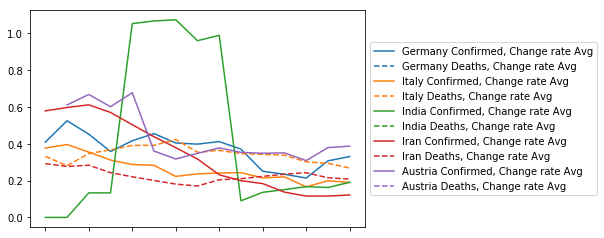

In [224]:
import matplotlib.pyplot as plt

for country in countries:
    ts = all[country]["Confirmed Rate Avg"].tail(15)
    pl = ts.plot(label=country+" Confirmed, Change rate Avg")

    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Rate Avg"].tail(15)
    ts.plot(label=country+" Deaths, Change rate Avg", linestyle='dashed', color=cl)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
